<a href="https://colab.research.google.com/github/jordanbell2357/signal-processing/blob/main/PontryaginDuality_R_mod_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\mathbb{Z}$

$\mathbb{Z}$ is a discrete LCA group.

Its Pontryagin dual $\widehat{\mathbb{Z}}$ is the set of continuous group homomorphisms $\mathbb{Z} \to S^1$.

Define $\psi:\mathbb{R}/\mathbb{Z} \to \widehat{\mathbb{Z}}$ by

$$\psi(x)(n) = e^{2\pi inx},\qquad x \in \mathbb{R}/\mathbb{Z}, n \in \mathbb{Z}$$.

$\psi$ is an isomoprhism of topological groups.

For $f \in \mathbb{C}^{\mathbb{Z}}$, define

$$|f|_{\ell^1(\mathbb{Z})} = \sum_{n \in \mathbb{Z}} |f(n)|$$

and define

$$
|f|_{\ell^2(\mathbb{Z})} = \left(\sum_{n \in \mathbb{Z}} |f(n)|^2 \right)^{1/2}
$$

For $f \in \ell^1(\mathbb{Z})$, define $\mathscr{F} f \in \mathbb{C}^{\mathbb{R} / \mathbb{Z}}$ by

\begin{align*}
(\mathscr{F} f)(x) &= \sum_{n \in \mathbb{Z}} f(n) \overline{\psi(x)(n)}\\
&= \sum_{n \in \mathbb{Z}} f(n) \overline{e^{2\pi inx}}\\
&=\sum_{n \in \mathbb{Z}} f(n) e^{-2\pi inx}
\end{align*}



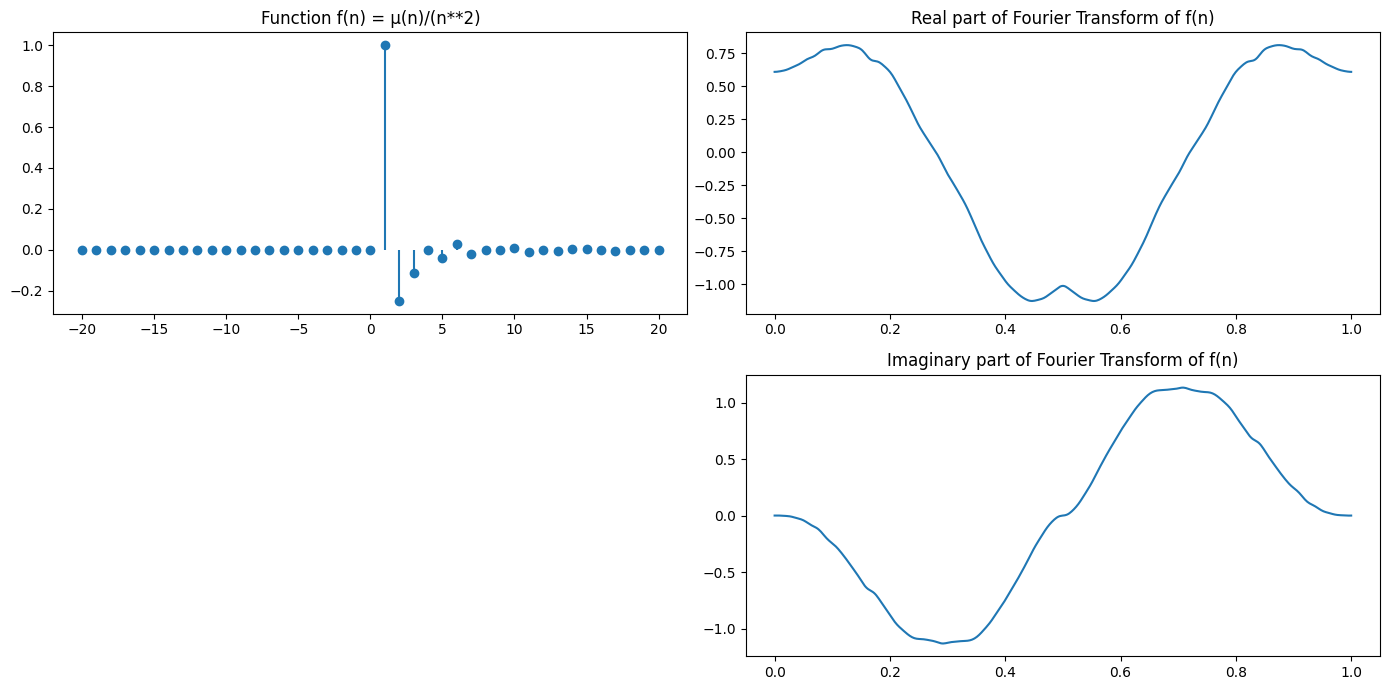

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the function f:Z -> C
def f(n):
    if n <= 0:
        return 0
    elif n > 0:
        return sp.mobius(n)/(n**2)

# Define the Fourier transform of f
def Fourier_f(x, terms):
    return np.sum([f(k) * np.exp(-2j * np.pi * k * x) for k in range(-terms, terms+1)])

# Values of terms and x to use
terms = 50  # Number of terms to calculate the Fourier series
n = 20  # Range for Fourier coefficients
x_values = np.linspace(0, 1, num=500)

# Calculate f and its Fourier transform
f_values = np.array([f(k) for k in range(-n, n+1)], dtype=np.complex128)
Fourier_f_values = np.array([Fourier_f(x, terms) for x in x_values], dtype=np.complex128)

# Plot f
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.stem(range(-n, n+1), f_values.real, basefmt=" ")
plt.title(f'Function f(n) = µ(n)/(n**2)')

# Plot the real part of Fourier transform of f
plt.subplot(2, 2, 2)
plt.plot(x_values, Fourier_f_values.real)
plt.title(f'Real part of Fourier Transform of f(n)')

# Plot the imaginary part of Fourier transform of f
plt.subplot(2, 2, 4)
plt.plot(x_values, Fourier_f_values.imag)
plt.title(f'Imaginary part of Fourier Transform of f(n)')

plt.tight_layout()
plt.show()

# $\mathbb{R}/\mathbb{Z}$

Let $\mathbb{R}/\mathbb{Z}$ be the additive quotient group.

Let $q:\mathbb{R} \to \mathbb{R}/\mathbb{Z}$ be defined by $q(x) = x + \mathbb{Z}$, $x \in \mathbb{R}$. Assign $\mathbb{R}/\mathbb{Z}$ the quotient topology induced by $q$.

$\mathbb{R}/\mathbb{Z}$ is a compact topological group. Thus, it is a compact LCA group.

## Dirichlet kernel

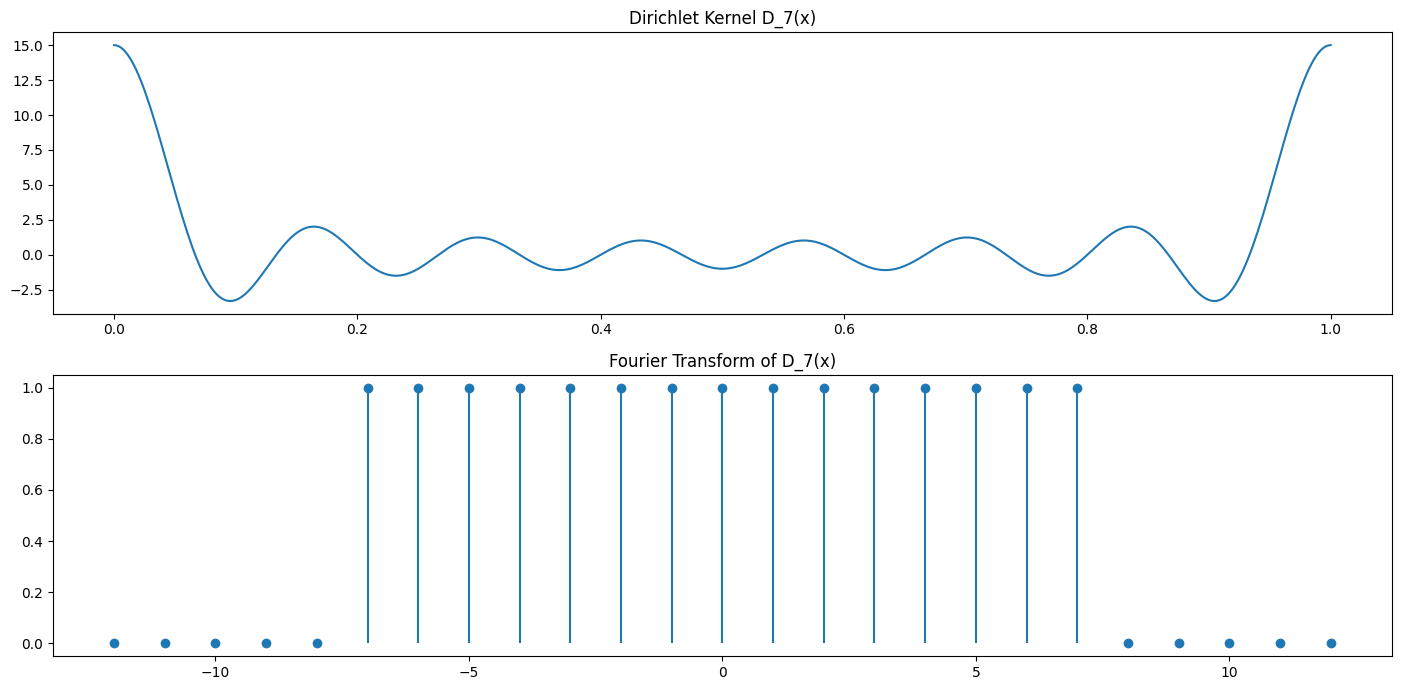

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Dirichlet kernel
def D_n(x, n):
    return np.sum([np.exp(2j * np.pi * k * x) for k in range(-n, n+1)])

# Define the Fourier transform of the Dirichlet kernel
def Fourier_D_n(k, n):
    def integrand(x):
        return D_n(x, n) * np.exp(-2j * np.pi * k * x)

    result, error = quad(lambda x: np.real(integrand(x)), 0, 1)
    return result

# Values of n, k, and x to use
n = 7
k_values = np.arange(-n-5, n+6)  # Go a bit beyond the expected range
x_values = np.linspace(0, 1, num=500)

# Calculate the Dirichlet kernel and its Fourier transform
D_n_values = np.array([D_n(x, n) for x in x_values])
Fourier_D_n_values = np.array([Fourier_D_n(k, n) for k in k_values])

# Plot the Dirichlet kernel
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(x_values, D_n_values.real)
plt.title(f'Dirichlet Kernel D_{n}(x)')

# Plot the Fourier transform of the Dirichlet kernel
plt.subplot(2, 1, 2)
plt.stem(k_values, Fourier_D_n_values, basefmt=" ")
plt.title(f'Fourier Transform of D_{n}(x)')

plt.tight_layout()
plt.show()


## Fejér kernel

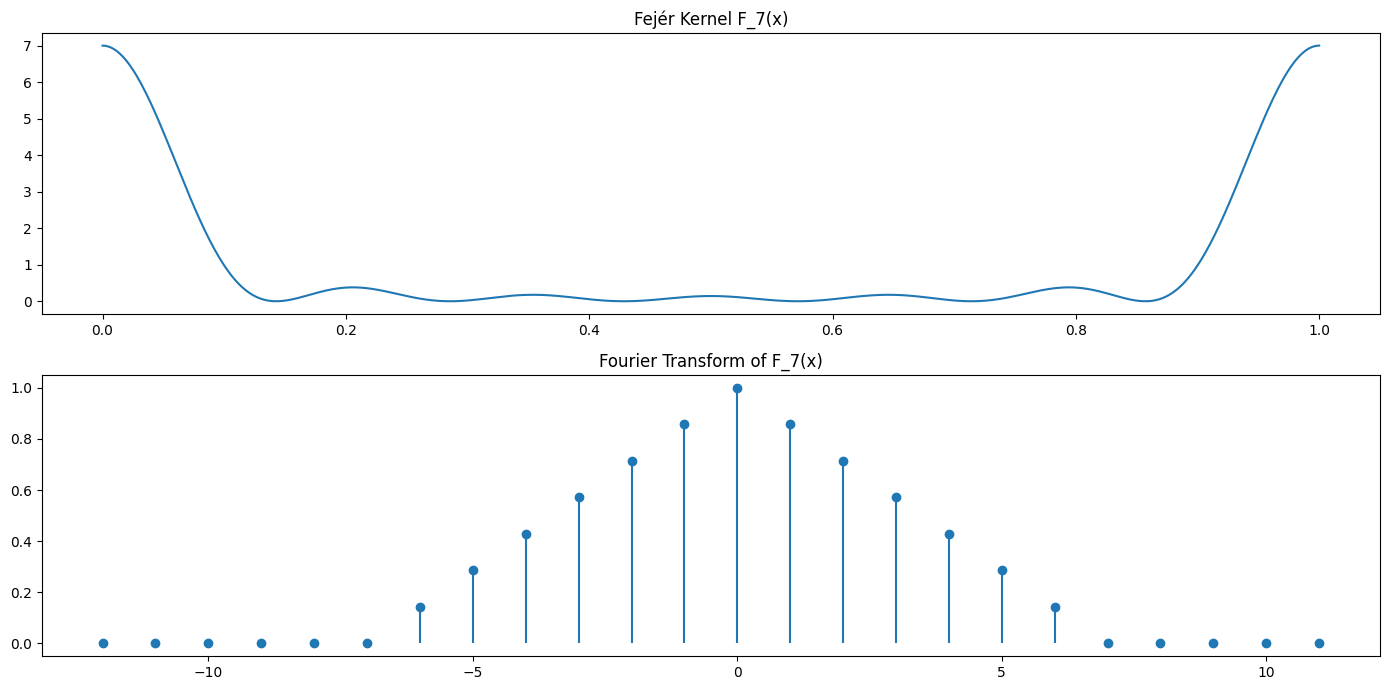

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Dirichlet kernel
def D_n(x, n):
    return np.sum([np.exp(2j * np.pi * k * x) for k in range(-n, n+1)])

# Define the Fejér kernel as an average of Dirichlet kernels
def F_n(x, n):
    return (1/n) * np.sum([D_n(x, k) for k in range(n)])

# Define the Fourier transform of the Fejér kernel
def Fourier_F_n(k, n):
    def integrand(x):
        return F_n(x, n) * np.exp(-2j * np.pi * k * x)

    result, error = quad(lambda x: np.real(integrand(x)), 0, 1)
    return result

# Values of n, k, and x to use
n = 7
k_values = np.arange(-n-5, n+5)  # Go a bit beyond the expected range
x_values = np.linspace(0, 1, num=500)

# Calculate the Fejer kernel and its Fourier transform
F_n_values = np.array([F_n(x, n) for x in x_values])
Fourier_F_n_values = np.array([Fourier_F_n(k, n) for k in k_values])

# Plot the Fejer kernel
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(x_values, F_n_values.real, label='Real part')
plt.title(f'Fejér Kernel F_{n}(x)')

# Plot the Fourier transform of the Fejer kernel
plt.subplot(2, 1, 2)
plt.stem(k_values, Fourier_F_n_values, basefmt=" ")
plt.title(f'Fourier Transform of F_{n}(x)')

plt.tight_layout()
plt.show()


## de la Vallée Poussin kernel

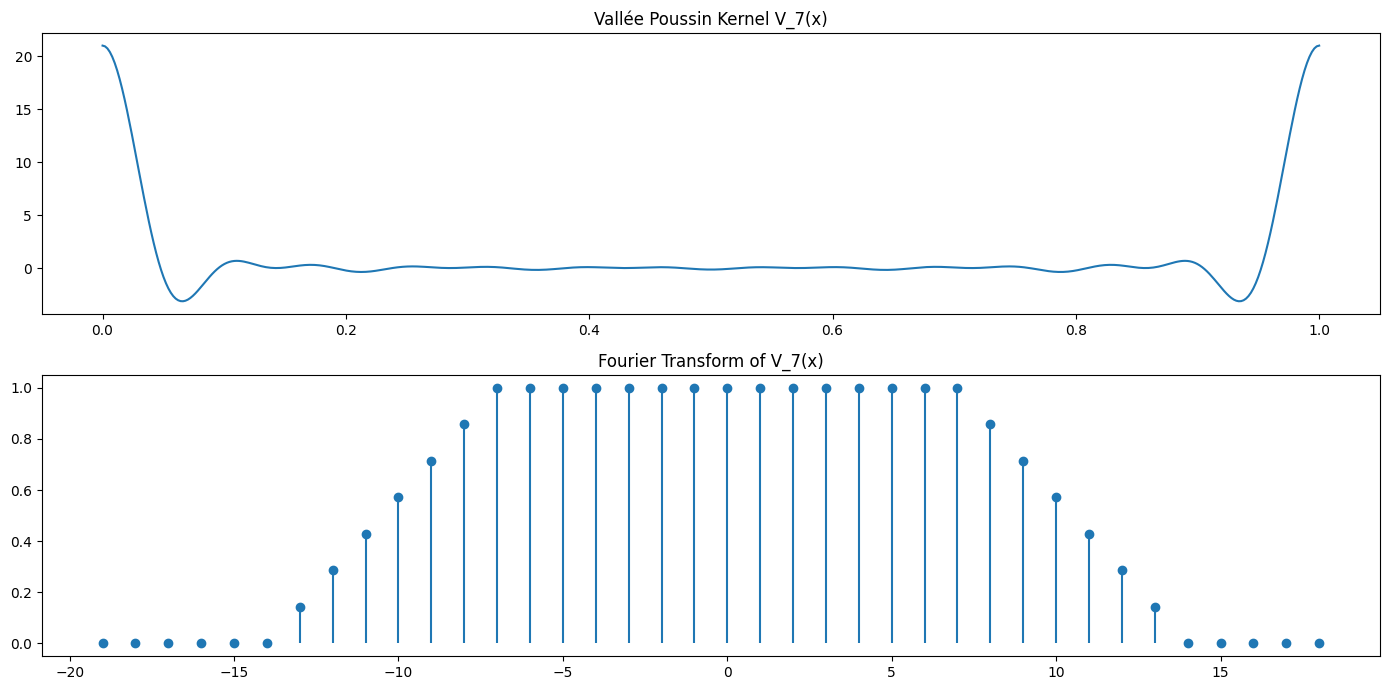

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Dirichlet kernel
def D_n(x, n):
    return np.sum([np.exp(2j * np.pi * k * x) for k in range(-n, n+1)])

# Define the Fejér kernel as an average of Dirichlet kernels
def F_n(x, n):
    return (1/n) * np.sum([D_n(x, k) for k in range(n)])

# Define the de la Vallée Poussin kernel
def V_n(x, n):
    return 2 * F_n(x, 2*n) - F_n(x, n)

# Define the Fourier transform of the de la Vallée Poussin kernel
def Fourier_V_n(k, n):
    def integrand(x):
        return V_n(x, n) * np.exp(-2j * np.pi * k * x)

    result, error = quad(lambda x: np.real(integrand(x)), 0, 1)
    return result

# Values of n, k, and x to use
n = 7
k_values = np.arange(-2*n-5, 2*n+5)  # Go a bit beyond the expected range
x_values = np.linspace(0, 1, num=500)

# Calculate the Vallée Poussin kernel and its Fourier transform
V_n_values = np.array([V_n(x, n) for x in x_values])
Fourier_V_n_values = np.array([Fourier_V_n(k, n) for k in k_values])

# Plot the Vallée Poussin kernel
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(x_values, V_n_values.real, label='Real part')
plt.title(f'Vallée Poussin Kernel V_{n}(x)')

# Plot the Fourier transform of the Vallée Poussin kernel
plt.subplot(2, 1, 2)
plt.stem(k_values, Fourier_V_n_values, basefmt=" ")
plt.title(f'Fourier Transform of V_{n}(x)')

plt.tight_layout()
plt.show()

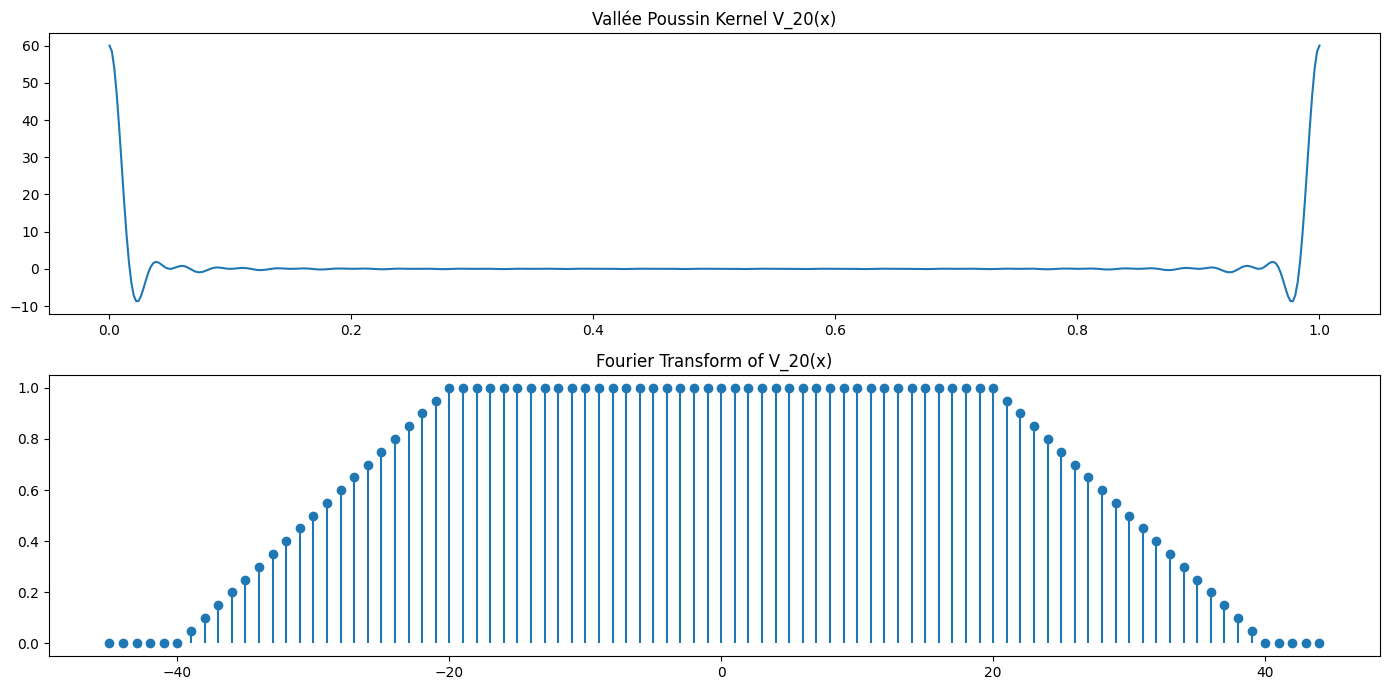

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Dirichlet kernel
def D_n(x, n):
    return np.sum([np.exp(2j * np.pi * k * x) for k in range(-n, n+1)])

# Define the Fejér kernel as an average of Dirichlet kernels
def F_n(x, n):
    return (1/n) * np.sum([D_n(x, k) for k in range(n)])

# Define the de la Vallée Poussin kernel
def V_n(x, n):
    return 2 * F_n(x, 2*n) - F_n(x, n)

# Define the Fourier transform of the de la Vallée Poussin kernel
def Fourier_V_n(k, n):
    def integrand(x):
        return V_n(x, n) * np.exp(-2j * np.pi * k * x)

    result, error = quad(lambda x: np.real(integrand(x)), 0, 1)
    return result

# Values of n, k, and x to use
n = 20
k_values = np.arange(-2*n-5, 2*n+5)  # Go a bit beyond the expected range
x_values = np.linspace(0, 1, num=500)

# Calculate the Vallée Poussin kernel and its Fourier transform
V_n_values = np.array([V_n(x, n) for x in x_values])
Fourier_V_n_values = np.array([Fourier_V_n(k, n) for k in k_values])

# Plot the Vallée Poussin kernel
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(x_values, V_n_values.real, label='Real part')
plt.title(f'Vallée Poussin Kernel V_{n}(x)')

# Plot the Fourier transform of the Vallée Poussin kernel
plt.subplot(2, 1, 2)
plt.stem(k_values, Fourier_V_n_values, basefmt=" ")
plt.title(f'Fourier Transform of V_{n}(x)')

plt.tight_layout()
plt.show()